In [98]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [99]:
plt.style.use('seaborn-v0_8')

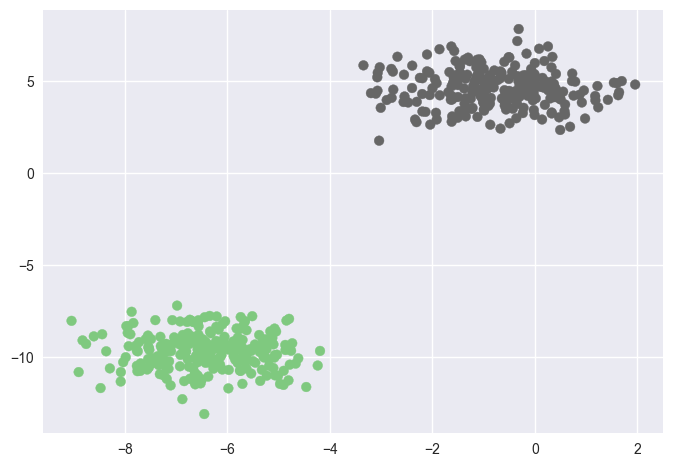

In [100]:
X, Y = make_blobs(n_samples=500, n_features=2, centers=2, random_state=11)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Accent)
Y = Y.reshape((-1, 1))

In [101]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

In [102]:
def predict(X, wghts):
    # X -> (m, n+1), wghts = (n+1, 1)
    z = np.dot(X, wghts)
    pred = sigmoid(z)
    return pred

In [103]:
def loss(X, Y, wghts):
    Y_ = predict(X, wghts)
    cost = np.mean((-Y*np.log(Y_) - (1 - Y)*np.log(1 - Y_)))
    return cost

In [104]:
def update(X, Y, wghts, learning_rate):
    Y_ = predict(X, wghts)
    dw = np.dot(X.T, Y_-Y)
    m = X.shape[0]
    wghts -= learning_rate * (dw / float(m))
    return wghts

In [105]:
def train(X, Y, learning_rate=0.1, maxepochs=100):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X = np.hstack((ones, X))
    n = X.shape[1]
    wghts = np.zeros((n, 1))
    losses = []
    for i in range(maxepochs):
        wghts = update(X, Y, wghts, learning_rate)
        if i%10 == 0:
            l = loss(X, Y, wghts)
            losses.append(l)
        
    return wghts, losses

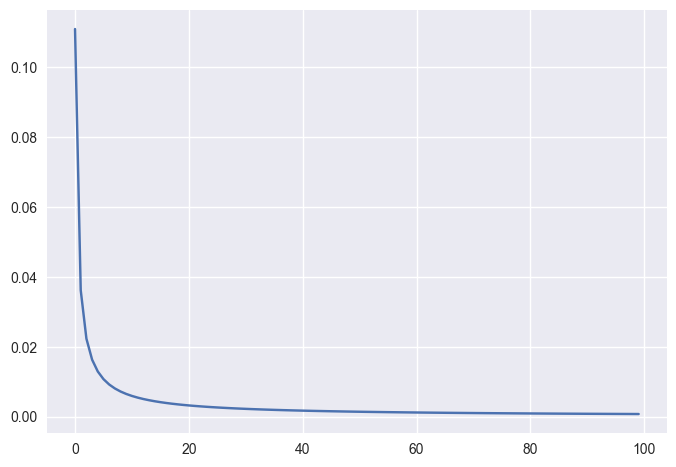

In [106]:
weights, losses = train(X, Y, learning_rate=0.1, maxepochs=1000)
plt.plot(losses)

In [107]:
def MakePrediction(testX, wghts, label=True):
    if(wghts.shape[1] != testX.shape[1]):
        ones = np.ones((testX.shape[0], 1))
        testX = np.hstack((ones, testX))
    probs = predict(testX, wghts)
    if not label:
        return probs
    else:
        labels = np.zeros((probs.shape[0], 1))
        labels[probs>=0.5] = 1
    return labels

In [108]:
Ypred = MakePrediction(X, weights)

In [109]:
accuracy = np.sum(Ypred == Y)/X.shape[0]

In [110]:
accuracy

1.0

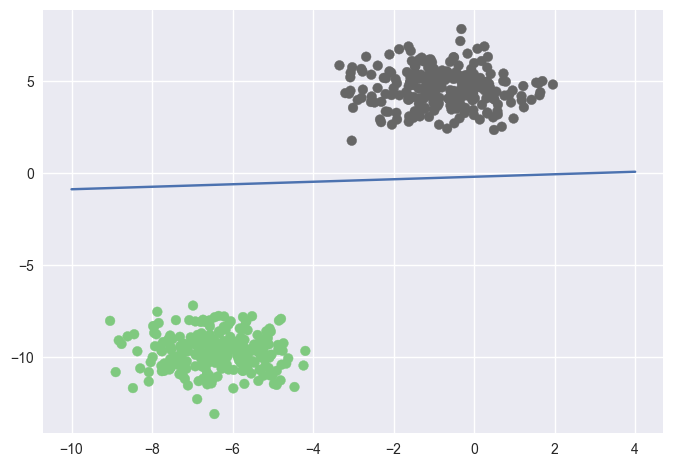

In [113]:
x = np.linspace(-10, 4, 10)
y = - (weights[0] + weights[1] * x) / weights[2]
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Accent)
plt.plot(x, y)
plt.show()

In [114]:
from sklearn.datasets import make_moons

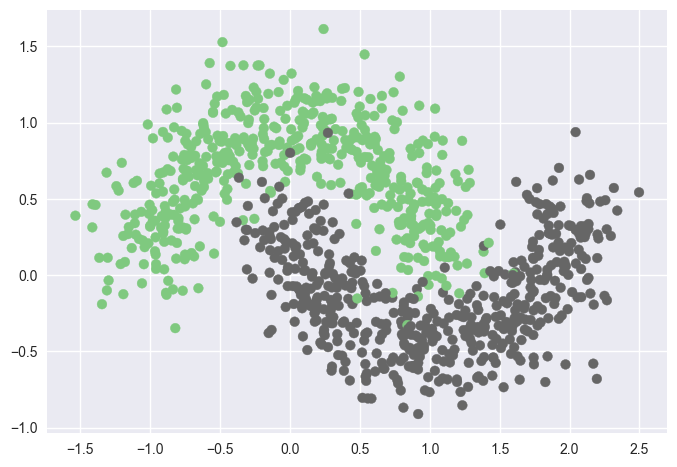

In [115]:
X, Y = make_moons(n_samples=1000, noise=0.2, random_state=3)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Accent)
Y = Y.reshape((-1, 1))

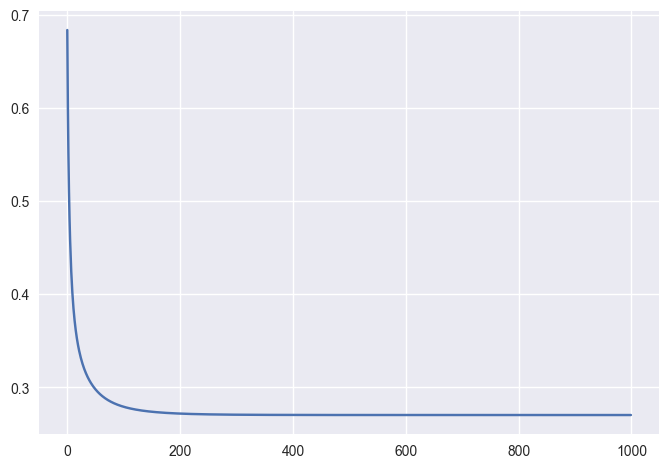

In [117]:
weights, losses = train(X, Y, learning_rate=0.1, maxepochs=10000)
plt.plot(losses)

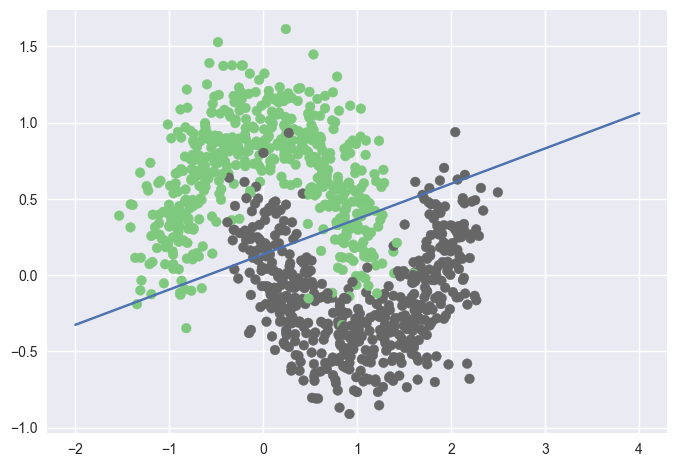

In [119]:
x = np.linspace(-2, 4, 10)
y = - (weights[0] + weights[1] * x) / weights[2]
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Accent)
plt.plot(x, y)
plt.show()

In [120]:
Ypred = MakePrediction(X, weights)
acc = np.sum(Ypred == Y)/X.shape[0]
acc

0.876